In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('/content/drive/My Drive/eng_dataset (1).csv')
df.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


In [3]:
df['sentiment']

0         anger
1         anger
2         anger
3         anger
4         anger
         ...   
7097    sadness
7098    sadness
7099    sadness
7100    sadness
7101    sadness
Name: sentiment, Length: 7102, dtype: object

In [4]:
#scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [6]:
#nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [7]:
#word2vec
import gensim

In [8]:
import re


In [9]:
#utility
from collections import Counter
import logging
import time
import pickle
import itertools

Text(0.5, 1.0, 'Dataset labels distribuition')

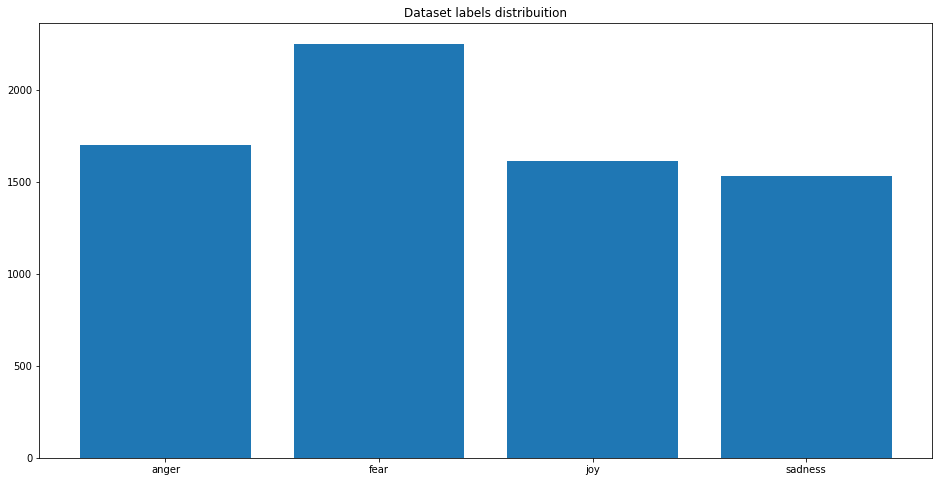

In [10]:
#count_emotion
sentiment_cnt = Counter(df.sentiment)
plt.figure(figsize=(16,8))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values())
plt.title("Dataset labels distribuition")

In [11]:
from gensim.models import Word2Vec

In [12]:
text =df.content
text

0       At the point today where if someone says somet...
1       @CorningFootball  IT'S GAME DAY!!!!      T MIN...
2       This game has pissed me off more than any othe...
3       @spamvicious I've just found out it's Candice ...
4       @moocowward @mrsajhargreaves @Melly77 @GaryBar...
                              ...                        
7097    @VivienLloyd Thank you so much! Just home - st...
7098                Just put the winter duvet on ☃️❄️🌬☔️ 
7099    @SilkInSide @TommyJoeRatliff that's so pretty!...
7100    @BluesfestByron second artist announcement loo...
7101    I can literally eat creamy pesto pasta topped ...
Name: content, Length: 7102, dtype: object

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.stem import WordNetLemmatizer
wordnet =WordNetLemmatizer()

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
corpus = []
for i in range(len(text)):
    sentences =re.sub('[^a-zA-Z]',' ',text[i])
    sentences = re.sub(r'\[[0-9] "\]',' ',sentences)
    sentences=re.sub(r'\s+',' ',sentences)
    sentences=re.sub(r'\d',' ',sentences)
    sentences=re.sub(r'\s+',' ',sentences)
    sentences =sentences.lower()
    sentences =sentences.split()
    sentences =[wordnet.lemmatize(word) for word in sentences if not word  in set(stopwords.words('english'))]
    sentences =' '.join(sentences)
    corpus.append(sentences)

In [18]:
corpus =[nltk.word_tokenize(sentence) for sentence in corpus]

In [19]:
print(corpus)

[['point', 'today', 'someone', 'say', 'something', 'remotely', 'kind', 'waterfall', 'burst', 'eye'], ['corningfootball', 'game', 'day', 'minus', 'relentless'], ['game', 'pissed', 'game', 'year', 'blood', 'boiling', 'time', 'turn', 'stlcards'], ['spamvicious', 'found', 'candice', 'candace', 'pout', 'like'], ['moocowward', 'mrsajhargreaves', 'melly', 'garybarlow', 'come', 'mum', 'th', 'k', 'tweet', 'soreloser'], ['moocowward', 'mrsajhargreaves', 'melly', 'garybarlow', 'come', 'mum', 'th', 'k', 'tweet', 'bitter', 'soreloser'], ['wan', 'na', 'go', 'home', 'focus', 'game', 'wan', 'na', 'rage'], ['virginmedia', 'disconnected', 'whilst', 'holiday', 'move', 'house', 'st', 'october', 'furious'], ['virginmedia', 'disconnected', 'whilst', 'holiday', 'move', 'house', 'st', 'october'], ['wan', 'na', 'see', 'smile', 'wan', 'na', 'see', 'make', 'frown'], ['shae', 'caitlin', 'ur', 'road', 'rage', 'give', 'anxiety'], ['emilsonwheels', 'furious'], ['etherealmystic', 'winning', 'war', 'raging', 'inside',

In [20]:
model =Word2Vec(corpus,min_count=1)

In [23]:
words =model.wv.vocab
words

{'point': <gensim.models.keyedvectors.Vocab at 0x7f0b2a98a6d8>,
 'today': <gensim.models.keyedvectors.Vocab at 0x7f0b2a98a748>,
 'someone': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf358>,
 'say': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf390>,
 'something': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf3c8>,
 'remotely': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf400>,
 'kind': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf438>,
 'waterfall': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf470>,
 'burst': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf4a8>,
 'eye': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf4e0>,
 'corningfootball': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf518>,
 'game': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf550>,
 'day': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf588>,
 'minus': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf5c0>,
 'relentless': <gensim.models.keyedvectors.Vocab at 0x7f0ad20cf5f8>,
 'pissed': <gensim.m

In [27]:
vector =model.wv['writer']
vector

array([-8.20680521e-03, -5.24828769e-03, -1.59732811e-03, -1.37335539e-03,
        6.86191535e-03,  1.18391095e-02, -8.57128017e-03, -2.93868640e-03,
       -2.00793911e-02,  2.91515933e-03, -9.42877028e-03,  3.73044191e-03,
        4.07041609e-03,  2.31559784e-03,  1.40348114e-02, -2.27795597e-02,
       -2.40947166e-03,  7.02558877e-03,  2.95697385e-03,  6.55069388e-03,
       -9.15218797e-03,  4.32704017e-03,  4.87980153e-03, -7.93385506e-03,
       -2.58615171e-03,  1.53663326e-02,  2.12155525e-02, -3.70204146e-03,
       -2.11613346e-02,  8.31959676e-03, -7.47005502e-03, -5.56562794e-03,
        8.02450068e-03,  2.23246892e-03, -9.89432354e-03, -9.25589178e-04,
       -6.89409114e-03,  8.71607661e-03,  4.71672509e-03,  3.96642508e-03,
       -1.76072004e-03,  1.52251953e-02,  9.49320570e-03, -9.64652561e-03,
        8.16911180e-03, -1.04850540e-02,  1.72953941e-02,  5.75129827e-03,
        3.18546128e-03, -2.49953568e-03,  5.24472306e-03,  9.04965709e-05,
        6.03092695e-03,  

In [28]:
similar =model.wv.most_similar('writer')
similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ok', 0.9457182288169861),
 ('trump', 0.9450316429138184),
 ('hate', 0.9446092844009399),
 ('black', 0.9439104795455933),
 ('future', 0.9439004063606262),
 ('give', 0.943850576877594),
 ('service', 0.9437921047210693),
 ('u', 0.9437047243118286),
 ('angry', 0.9436348676681519),
 ('every', 0.943619430065155)]